##  Dependencies and Setup

In [8]:
  # Importing library
%matplotlib inline

In [21]:
  # Importing external packages
import numpy as np
import matplotlib.patches as mpatches
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
  # File to Load 
ticket_data = "output_data//cleansed_dataframe.xlsx"

In [11]:
  # Read the Ticket file and store Pandas data frame
df_ticket_cl = pd.read_excel(ticket_data)

  # Print out in the window
df_ticket_cl.head()

,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Due_Date,Due Time,Due Year,Due Month,Due Day,Due_day_of_week,Closed_Date,Closed Time,Pended_Date,Pended Time
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/05/18 22:07,11/20/18 21:00,11/16/18 07:45,MyHRW,...,2018-11-20,21:00:00,2018,11,20,Tuesday,2018-11-16,07:45:00,NaT,NaN
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/05/18 23:00,11/13/18 22:01,11/05/18 23:21,MyHRW,...,2018-11-13,22:01:00,2018,11,13,Tuesday,2018-11-05,23:21:00,NaT,NaN
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/06/18 04:18,11/07/18 22:01,11/06/18 04:52,MyHRW,...,2018-11-07,22:01:00,2018,11,7,Wednesday,2018-11-06,04:52:00,NaT,NaN
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,11/06/18 04:58,11/08/18 22:01,11/06/18 05:04,MyHRW,...,2018-11-08,22:01:00,2018,11,8,Thursday,2018-11-06,05:04:00,NaT,NaN
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/06/18 06:06,11/13/18 22:01,11/06/18 07:31,MyHRW,...,2018-11-13,22:01:00,2018,11,13,Tuesday,2018-11-06,07:31:00,NaT,NaN


### Yearly Count

The following graph has a year by year breakdown of tickets.

In [12]:
   # Declare DataFrame
df_ticket_cl_1= df_ticket_cl.groupby('Creation Year')
   # Get the total number of tickets by Year 
number_of_tickets_per_year = df_ticket_cl_1['Company'].count()
   # Output DataFrame
tickets_per_year_df = pd.DataFrame(data = number_of_tickets_per_year,index = None).reset_index()
tickets_per_year_df = tickets_per_year_df.rename(columns = {"Creation Year":"Year","Company":"Total Number of Tickets"})
   # Print out in the window 
tickets_per_year_df

,Year,Total Number of Tickets
0,2018,39519
1,2019,25167


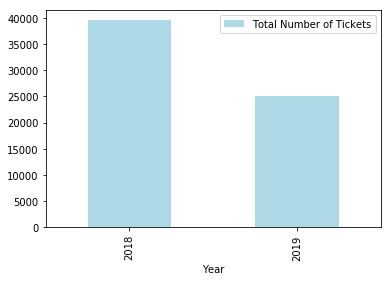

In [22]:
  # Create the bar chart
ax = tickets_per_year_df.plot.bar(x='Year', y='Total Number of Tickets', rot=90, color='lightblue')
#   # Save Figure
plt.savefig("Images/x_Tickets_per_Year.png",bbox_inches = "tight")

###  Monthly count

The following graph has a month by month breakdown.

In [14]:
   # Declare DataFrame
df_ticket_cl_2= df_ticket_cl.groupby('Creation Month')
   # Get the total number of tickets by Month 
number_of_tickets_per_month = df_ticket_cl_2['Company'].count()
   # Output DataFrame
tickets_per_month_df = pd.DataFrame(data = number_of_tickets_per_month,index = None).reset_index()
tickets_per_month_df = tickets_per_month_df.rename(columns = {"Creation Month":"Month","Company":"Total Number of Tickets"})
   # Print out in the window 
tickets_per_month_df

,Month,Total Number of Tickets
0,1,11241
1,2,9501
2,3,4437
3,4,10
4,5,9
5,6,14
6,7,26
7,8,18
8,9,8817
9,10,10135


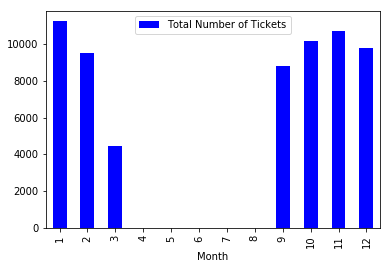

In [23]:
   # Create the bar chart
ax = tickets_per_month_df.plot.bar(x='Month', y='Total Number of Tickets', rot=90, color='b')
   # Save Figure
plt.savefig("Images/x_Tickets_per_Month.png",bbox_inches = "tight")
   # Print out in the window
plt.show()

###  Daily Count

The most popular time of the week to the employee call HRServices is...

In [24]:
#    # Declare DataFrame
df_ticket_cl_3= df_ticket_cl.groupby('Creation_day_of_week')
#    # Get the total number of tickets by Day 
number_of_tickets_per_day = df_ticket_cl_3['Company'].count()
    # Output DataFrame
tickets_per_day_df = pd.DataFrame(data = number_of_tickets_per_day,index = None).reset_index()
tickets_per_day_df = tickets_per_day_df.rename(columns = {"Creation_day_of_week":"Day","Company":"Total Number of Tickets"})
#    # Print out in the window 
tickets_per_day_df

,Day,Total Number of Tickets
0,Friday,12568
1,Monday,12770
2,Saturday,509
3,Sunday,630
4,Thursday,12788
5,Tuesday,12450
6,Wednesday,12971


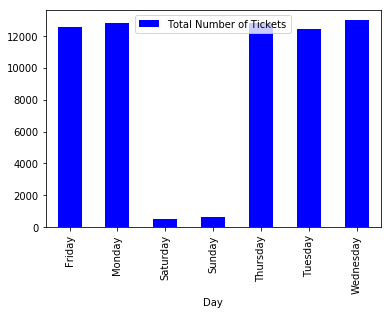

In [26]:
#   # Create the bar chart
ax = tickets_per_day_df.plot.bar(x='Day', y='Total Number of Tickets', rot=90, color='b')
#   # Save Figure
plt.savefig("Images/x_Tickets_per_Day.png",bbox_inches = "tight")
#   # Print out in the window
plt.show()

### Hourly Count

In this section we see that that the xxxxx hours are the most popular from xx through xxx 


In [34]:
#    # Declare DataFrame
df_ticket_cl_4= df_ticket_cl.groupby('Creation Time')
print(df_ticket_cl_4)
#    # Get the total number of tickets by Hour 
number_of_tickets_per_hour = df_ticket_cl_4['Company'].count()
#    # Output DataFrame
tickets_per_hour_df = pd.DataFrame(data = number_of_tickets_per_hour,index = None).reset_index()
tickets_per_hour_df = tickets_per_hour_df.rename(columns = {"Company":"Total Number of Tickets"})
#    # Print out in the window 
tickets_per_hour_df['Hour'] = tickets_per_hour_df['Creation Time'].str[:2]
tickets_per_hour_df['Minute'] = tickets_per_hour_df['Creation Time'].str[3:5]
tickets_per_hour_df['Second'] = tickets_per_hour_df['Creation Time'].str[-2:]

#tickets_per_hour_df['Minute'] = tickets_per_hour_df['Creation Time'].apply(lambda x: x[len(x)/2-1:len(x)/2+1])3,5
tickets_per_hour_df

,Creation Time,Total Number of Tickets,Hour,Minute,Second
0,00:00:00,83,00,00,00
1,00:01:00,10,00,01,00
2,00:02:00,13,00,02,00
3,00:03:00,14,00,03,00
4,00:04:00,11,00,04,00
5,00:05:00,14,00,05,00
6,00:06:00,18,00,06,00
7,00:07:00,17,00,07,00
8,00:08:00,18,00,08,00
9,00:09:00,13,00,09,00


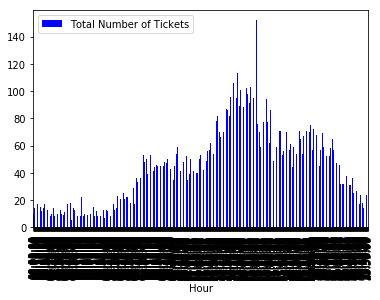

In [28]:
#   # Create the bar chart
ax = tickets_per_hour_df.plot.bar(x='Hour', y='Total Number of Tickets', rot=90, color='b')
#   # Save Figure
plt.savefig("Images/x_Tickets_per_Hour.png",bbox_inches = "tight")
#   # Print out in the window
plt.show()

### Daily and Houly Count Combined

A heatmap by week day and hour ....

In [ ]:
# # Create an array of the days of the week 
# days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# # Use seaborn to create heat map 
# df_heat = df_ticket_cl(["Creation Time", "Creation_day_of_week"])["Company"].size().reset_index()
# df_heat2 = df_ticket_cl("Creation Time", "Creation_day_of_week", "Company")
#df_heat

In [ ]:
# fig, ax = plt.subplots(figsize=(10,8))       
# sns.heatmap(df_heat2[days_arr] , cmap="YlOrRd")
# plt.title("Total Number of Tickets by the Hour and Day of the Week.")
# # Save image
# # plt.savefig("Images/x_Hours-day.png")
# plt.show()